In [0]:
pip install apyori

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

In [0]:
# STEP 1: RUN THIS CELL TO INSTALL BAMBOOLIB

# You can also install bamboolib on the cluster. Just talk to your cluster admin for that
%pip install bamboolib  

# Heads up: this will restart your python kernel, so you may need to re-execute some of your other code cells.

In [0]:
# STEP 2: RUN THIS CELL TO IMPORT AND USE BAMBOOLIB

import bamboolib as bam

# This opens a UI from which you can import your data
bam  

# Already have a pandas data frame? Just display it!
# Here's an example
# import pandas as pd
# df_test = pd.DataFrame(dict(a=[1,2]))
# df_test  # <- You will see a green button above the data set if you display it

In [0]:
df = pd.read_csv("/dbfs/FileStore/shared_uploads/wnsah10001@gmail.com/Groceries_dataset.csv")

In [0]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [0]:
df.isnull().sum().sort_values(ascending=False)

Out[5]: Member_number      0
Date               0
itemDescription    0
dtype: int64

In [0]:
df.isna().sum()
df.shape
df.size
df.ndim
df.itemDescription.value_counts().head(10)

Out[6]: whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


Out[8]: Text(0.5, 1.0, 'Top 10 selling items')

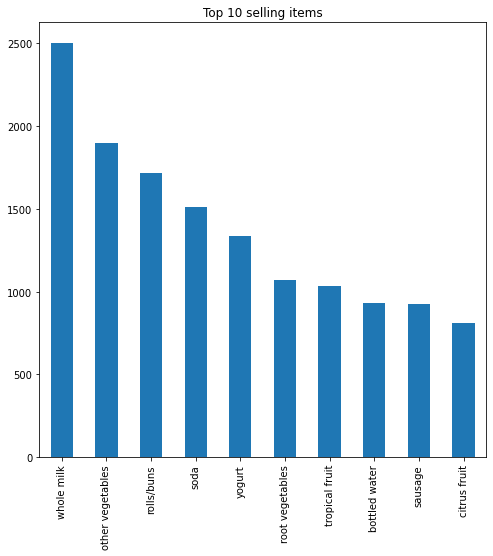

In [0]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 selling items')

Out[9]: Text(0.5, 1.0, 'Top 10 least selling items')

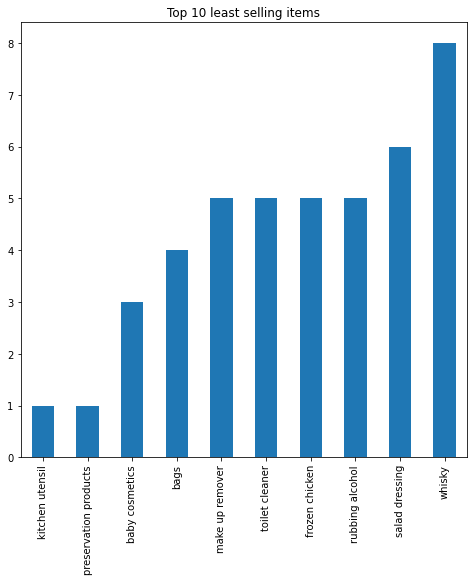

In [0]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('Top 10 least selling items')

In [0]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


Out[11]: [Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

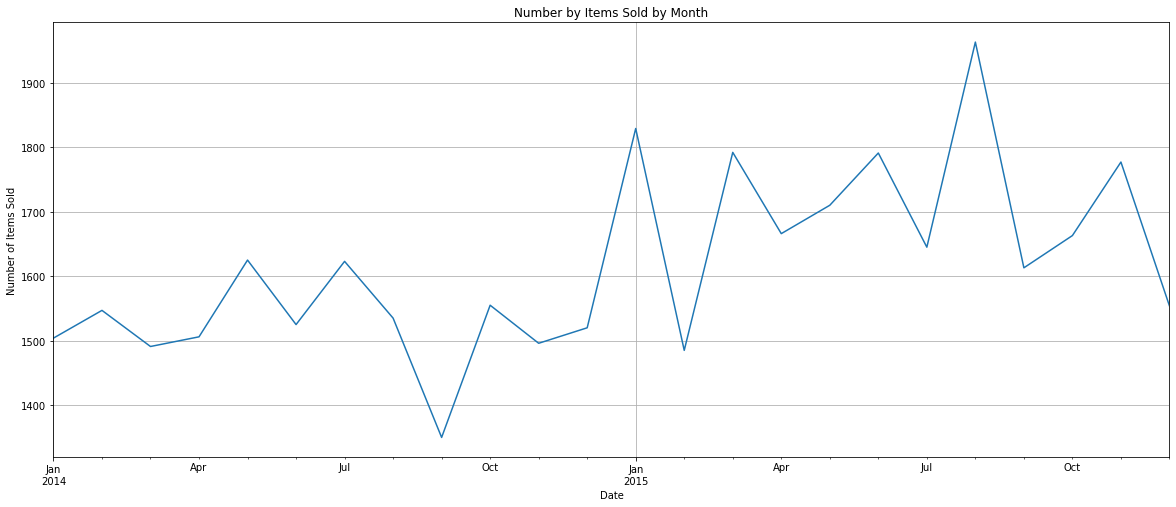

In [0]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [0]:
data = df.copy()
data1 = df.copy()
data = pd.get_dummies(data['itemDescription'])
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
data1.drop(['itemDescription'], axis = 1, inplace = True)
data1 = data1.join(data)
data1.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
products = df['itemDescription'].unique()
products

Out[16]: array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (

In [0]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()
data2

tropical fruit 
 whole milk 
 pip fruit 
 other vegetables 
 rolls/buns 
 pot plants 
 citrus fruit 
 beef 
 frankfurter 
 chicken 
 ... 
 flower (seeds) 
 rice 
 tea 
 salad dressing 
 specialty vegetables 
 pudding powder 
 ready soups 
 make up remover 
 toilet cleaner 
 preservation products 
 
 
 Member_number 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1000 
 2014-06-24 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-03-15 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-05-27 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-07-24 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-11-25 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4999 
 2015-05-16 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-12-26 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 5000 
 2014-09-03 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2014-11-16 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-10-02 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 14963 rows × 167 columns

In [0]:
def funct(data):
  for i in products:
    if data[i] > 0:
      data[i] = i

  return data 

In [0]:
data2 = data2.apply(funct, axis = 1)
data2.head()

tropical fruit 
 whole milk 
 pip fruit 
 other vegetables 
 rolls/buns 
 pot plants 
 citrus fruit 
 beef 
 frankfurter 
 chicken 
 ... 
 flower (seeds) 
 rice 
 tea 
 salad dressing 
 specialty vegetables 
 pudding powder 
 ready soups 
 make up remover 
 toilet cleaner 
 preservation products 
 
 
 Member_number 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1000 
 2014-06-24 
 0 
 whole milk 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-03-15 
 0 
 whole milk 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-05-27 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-07-24 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2015-11-25 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 167 columns

In [0]:
newdata = data2.values

In [0]:
newdata.ndim

newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [0]:
newdata[:10]

Out[22]: [['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread']]

In [0]:
from apyori import apriori 
association = apriori(newdata, min_support = 0.0003, min_confidence = 0.05, max_length = 3, min_lift = 3)
result = list(association)

In [0]:
result

Out[28]: [RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'roll products ', 'meat'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'salt', 'misc. beverages'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc

In [0]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(result), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [0]:
resultsinDataFrame.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
5,soups,seasonal products,0.000334,0.104167,14.704206
20,fruit/vegetable juice,sausage,0.000334,0.500000,8.285161
21,margarine,sausage,0.000334,0.312500,5.178225
9,canned beer,frozen vegetables,0.000334,0.138889,4.959891
12,butter milk,yogurt,0.000334,0.416667,4.851816
10,sausage,canned beer,0.000401,0.222222,4.736626
15,soda,yogurt,0.000401,0.400000,4.657743
24,ice cream,rolls/buns,0.000334,0.500000,4.545261
13,canned beer,sausage,0.000334,0.250000,4.142580
19,coffee,sausage,0.000334,0.238095,3.945315
